In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from random import randint
from scipy.stats import norm
import math

def moment(xn, k=1):
    return sum(x ** k for x in xn) / len(xn)

def get_random_indexes(n):
    return (randint(0, n - 1) for _ in range(n))

def make_bootstrap(xn, m):
    res = []
    for _ in range(m):
        res.append([xn[i] for i in get_random_indexes(len(xn))])
    return res

def estimation_OMM(xn):
    return 2 / 3 * np.mean(xn)

def estimation_OMP(xn):
    return (len(xn) + 1) * max(xn) / (2 * len(xn) + 1)

def make_bootstrap_interval(xn, m, estimation, betta, name):
    bootstrap = []
    tetta_est = estimation(xn)
    for _ in range(m):
        bootstrap.append(np.random.uniform(low=tetta_est, high=2 * tetta_est, size=len(xn)))
    var_row = []
    for b in bootstrap:
        var_row.append(estimation(b))
    var_row = np.sort(np.array(var_row))
    k1 = math.floor((1 - betta) / 2 * m)
    k2 = math.floor((1 + betta) / 2 * m)
    print(f'''Доверительный интервал (параметрический, bootstrap, {name}): 
                {var_row[k1]} < tetta < {var_row[k2]}''')
    print("Его длина:", var_row[k2] - var_row[k1])
    return var_row[k1], var_row[k2]

def central_moment(xn, k=2):
    return sum((x - moment(xn, 1)) ** k for x in xn) / len(xn)
    
def print_characteristics(tetta, n):
    xn = np.random.uniform(low=tetta, high=2 * tetta, size=n) 
    print("выборка:", np.sort(np.array(xn)))
    
    betta = 0.95
    t1 = ((1 - betta) / 2) ** (1 / n) + 1
    t2 = ((1 + betta) / 2) ** (1 / n) + 1 
    print("квантили:", t1, t2)
    print("точный доверительный интервал:", max(xn) / t2, "< tetta <", max(xn) / t1)
    print("Его длина:", max(xn) / t1 - max(xn) / t2)
    
    am1 = 2 / 3 * np.mean(xn) - 1.96 * ((moment(xn, 2) - moment(xn) ** 2) / n) ** 0.5 * 2 / 3
    am2 = 2 / 3 * np.mean(xn) + 1.96 * ((moment(xn, 2) - moment(xn) ** 2) / n) ** 0.5 * 2 / 3
    print("асимтотический доверительный интервал ОММ:", am1, "< tetta <", am2)
    print("Его длина:", am2 - am1)
    
    ap1 = max(xn) / 2 / (1.96 / n ** 0.5 + 1) 
    ap2 = max(xn) / 2 / (-1.96 / n ** 0.5 + 1)
    print("асимтотический доверительный интервал ОМП:", ap1, "< tetta <", ap2)
    print("Его длина:", ap2 - ap1)
    
    OMM_t1, OMM_t2 = make_bootstrap_interval(xn, 50000, estimation_OMM, 0.95, "OMM")
    
    OMP_t1, OMP_t2 = make_bootstrap_interval(xn, 50000, estimation_OMP, 0.95, "OMP")
    
    plt.grid(True)
    plt.plot((max(xn) / t2, max(xn) / t1), (0, 0), label="Точный")
    plt.plot((am1, am2), (1, 1), label="асимтотический ОММ")
    #plt.plot((ap1, ap2), (2, 2), label="асимтотический ОМП")
    plt.plot((OMM_t1, OMM_t2), (3, 3), label= "параметрический, bootstrap, ОММ")
    plt.plot((OMP_t1, OMP_t2), (4, 4), label= "параметрический, bootstrap, ОМП")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

выборка: [2.54769098 2.56004295 2.56698043 2.58997954 2.63332926 2.64909425
 2.64941074 2.67394945 2.67801211 2.69214199 2.70170899 2.75896201
 2.7882025  2.79035491 2.81867635 2.83005024 2.85701413 2.92171366
 2.93713226 2.96562039 2.97898675 2.99321657 3.02326167 3.08805382
 3.09834244 3.11408254 3.11856341 3.15694066 3.16020428 3.18131187
 3.21836818 3.25985601 3.28256875 3.30321432 3.31273782 3.3157701
 3.33775235 3.40089681 3.45253695 3.47110512 3.4920169  3.51944734
 3.53018285 3.55050066 3.59276627 3.61685654 3.67492615 3.69283615
 3.72748529 3.76909279 3.78664465 3.78851505 3.81856244 3.8714852
 3.8849151  3.92475052 3.92482622 3.94173132 3.94885418 4.01973996
 4.0322171  4.05451947 4.06514034 4.0798876  4.08411934 4.11033517
 4.11818932 4.1949091  4.21549297 4.24547405 4.25254205 4.25862178
 4.26523904 4.31209383 4.34921428 4.37406012 4.37977102 4.41772154
 4.42457964 4.45865212 4.49345622 4.50767808 4.52049116 4.5325348
 4.56474314 4.58068895 4.62539604 4.62544265 4.65304052 

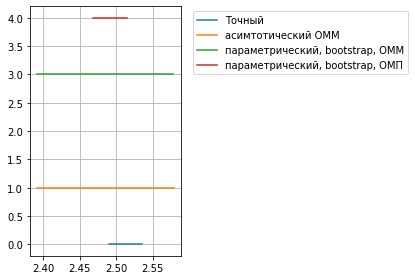

In [5]:
print_characteristics(25, 100)